<a href="https://colab.research.google.com/github/Smjfirna/Bike-Sharing-Data-Analisys/blob/main/Bike%20Sharing%20Analisys%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the Business Question

- Is there a difference in bicycle demand between weekday and holyday?
- How does weather affect bicycle demand?
- How does bicycle usage differ between registered and unregistered users?
- Is there a seasonal trend in bicycle usage?

## Import Packages/Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#download dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 27.0MB/s]


In [4]:
#Unzip Dataset File
!unzip -q bike-sharing-dataset.zip -d /content

### Assessing Data

1. Table Day

In [5]:
#display day dataframe
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#information about DF day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
#see the number of missing values in each column
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
#view the number of duplicate data
day_df.duplicated().sum()

0

In [9]:
#description of day dataframe statistics
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


2. tabel hour

In [10]:
#display hour dataframe
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
#information dataframe hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
#see the number of missing values in each column
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [13]:
#checking the number of duplicate data
hour_df.duplicated().sum()

0

In [14]:
#description of hour dataframe statistics
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


After analyzing this conclusion, data cleaning must be done:
DF day
1. dtday data type needs to be changed to datetime
2. delete instat column -> no longer needed
3. make the data in weathersit categorical for easy understanding

DF hour
1. remove instant
2. change dtday to datetime
3. inconsistent data in 'weathersit' column

### Cleaning Data

1. DF day

In [15]:
# change dtday column format from object -> datetime
datetime_colum = ["dteday"]
for column in datetime_colum:
  day_df[column] = pd.to_datetime(day_df[column])

In [16]:
#confirm whether the data type has been successfully changed
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
#remove instant column
day_df = day_df.drop(columns=["instant"])

In [18]:
#make sure the column is deleted
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


In [19]:
#check the value in weathersit because in the dataset explanation there are 4 types but in the day only 3
#inconsistent data
day_df.weathersit.value_counts()

,count
weathersit,
1,463
2,247
3,21


2. DF hour

In [20]:
# change dtday column format from object -> datetime
datetime_colum = ["dteday"]
for column in datetime_colum:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [21]:
#make sure the column is deleted
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [22]:
#remove instant column
hour_df = hour_df.drop(columns=["instant"])

In [23]:
#make sure the column is deleted
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [24]:
#check the value of weathersit because in the dataset explanation there are 4 types but in the day only 3
#there are 4 weatersit values in DF hour
hour_df.weathersit.value_counts()

,count
weathersit,
1,11413
2,4544
3,1419
4,3


##Change the data back to categorical to simplify the analysis process.

1. DF day

In [25]:
#change the day dataframe
day_df["yr"] = day_df["yr"].map({
    0:'2011', 1:'2012'
})
day_df["workingday"] = day_df["workingday"].map({
    0:'Holiday', 1:'workingday'
})
day_df["season"] = day_df["season"].map({
    1:'springer', 2:'summer', 3:'fall', 4:'winter'
})
day_df["mnth"] = day_df["mnth"].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
})
day_df["weekday"] = day_df["weekday"].map({
    0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'
})
day_df["weathersit"] = day_df["weathersit"].map({
    1:'Clear, cloudy', 2:'Mist + Cloudy',
    3:'Light, Snow, Rain, Thunderstorm', 4:'Heavy Rain, Ice, Thunderstorm'
})
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,springer,2011,Jan,0,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,springer,2011,Jan,0,Sun,Holiday,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,springer,2011,Jan,0,Mon,workingday,"Clear, cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,springer,2011,Jan,0,Tue,workingday,"Clear, cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,springer,2011,Jan,0,Wed,workingday,"Clear, cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. DF hour

In [26]:
#change hour dataframe
hour_df["yr"] = hour_df["yr"].map({
    0:'2011', 1:'2012'
})
hour_df["workingday"] = hour_df["workingday"].map({
    0:'Holiday', 1:'workingday'
})
hour_df["season"] = hour_df["season"].map({
    1:'springer', 2:'summer', 3:'fall', 4:'winter'
})
hour_df["mnth"] = hour_df["mnth"].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
})
hour_df["weekday"] = hour_df["weekday"].map({
    0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'
})
hour_df["weathersit"] = hour_df["weathersit"].map({
    1:'Clear, cloudy', 2:'Mist + Cloudy',
    3:'Light, Snow, Rain, Thunderstorm', 4:'Heavy Rain, Ice, Thunderstorm'
})
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,springer,2011,Jan,0,0,Sat,Holiday,"Clear, cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,springer,2011,Jan,1,0,Sat,Holiday,"Clear, cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,springer,2011,Jan,2,0,Sat,Holiday,"Clear, cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,springer,2011,Jan,3,0,Sat,Holiday,"Clear, cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,springer,2011,Jan,4,0,Sat,Holiday,"Clear, cloudy",0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

In [27]:
#description of weekday by number
day_df.groupby("weekday").agg({
    "cnt" :['max', 'min', 'mean', 'sum']
}).reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

cnt                           
          max   min         mean     sum
weekday                                 
Sun      8227   605  4228.828571  444027
Mon      7525    22  4338.123810  455503
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048
Thu      7804   431  4667.259615  485395
Fri      8362  1167  4690.288462  487790
Sat      8714   627  4550.542857  477807

In [28]:
#description of workingday by number
day_df.groupby("workingday").agg({
     "cnt" :['max', 'min', 'mean', 'sum']
})

cnt                           
             max  min         mean      sum
workingday                                 
Holiday     8714  605  4330.168831  1000269
workingday  8362   22  4584.820000  2292410

In [29]:
#description of temp, atemp, hum, windspeed and amount
day_df.agg({
    'temp': ['mean', 'min', 'max'],
    'atemp': ['mean', 'min', 'max'],
    'hum': ['mean', 'min', 'max'],
    'windspeed': ['mean', 'min', 'max'],
    'cnt': ['mean', 'min', 'max', 'sum']
})

,temp,atemp,hum,windspeed,cnt
mean,0.495385,0.474354,0.627894,0.190486,4.504349e+03
min,0.059130,0.079070,0.000000,0.022392,2.200000e+01
max,0.861667,0.840896,0.972500,0.507463,8.714000e+03
sum,NaN,NaN,NaN,NaN,3.292679e+06


In [30]:
#description of seasons by number
day_df.groupby("season").agg({
     "cnt" :['max', 'min', 'mean', 'sum']
})

cnt                            
           max   min         mean      sum
season                                    
fall      8714  1115  5644.303191  1061129
springer  7836   431  2604.132597   471348
summer    8362   795  4992.331522   918589
winter    8555    22  4728.162921   841613

In [31]:
#month descriptions by number
day_df.groupby("mnth").agg({
     "cnt" :['max', 'min', 'mean', 'sum']
}).reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

cnt                           
       max   min         mean     sum
mnth                                 
Jan   4521   431  2176.338710  134933
Feb   5062  1005  2655.298246  151352
Mar   8362   605  3692.258065  228920
Apr   7460   795  4484.900000  269094
May   8294  2633  5349.774194  331686
Jun   8120  3767  5772.366667  346342
Jul   8173  3285  5563.677419  344948
Aug   7865  1115  5664.419355  351194
Sep   8714  1842  5766.516667  345991
Oct   8156    22  5199.225806  322352
Nov   6852  1495  4247.183333  254831
Dec   6606   441  3403.806452  211036

In [32]:
#description of seasons based on casual and registered users
day_df.groupby('season').agg({
    "casual" :['max', 'min', 'mean', 'sum'],
    "registered" :['max', 'min', 'mean', 'sum']
})

casual                           registered                          
            max  min         mean     sum        max  min         mean     sum
season                                                                        
fall       3160  118  1202.611702  226091       6917  889  4441.691489  835038
springer   3155    9   334.928177   60622       5315  416  2269.204420  410726
summer     3410  120  1106.097826  203522       6456  674  3886.233696  715067
winter     3031    2   729.112360  129782       6946   20  3999.050562  711831

In [33]:
#wathersit by number, casual and registered
hour_df.groupby('weathersit').agg({
    "cnt" :['sum'],
    "casual" :['sum'],
    "registered" :['sum']
})

,cnt,casual,registered
,sum,sum,sum
weathersit,,,
"Clear, cloudy",2338173,462745,1875428
"Heavy Rain, Ice, Thunderstorm",223,8,215
"Light, Snow, Rain, Thunderstorm",158331,22783,135548
Mist + Cloudy,795952,134481,661471


### Explore ...

## Visualization & Explanatory Analysis

### Question 1: Is there a difference in bicycle demand between weekday and holyday?

<ipython-input-34-89fe4d0050f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


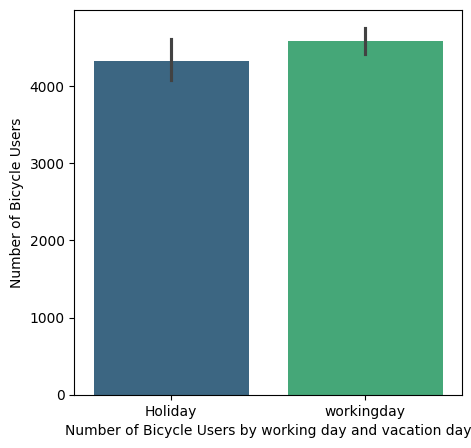

In [34]:
#visualization of question 1
plt.figure(figsize=(5,5))
sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df,
    palette='viridis')

plt.title('')
plt.xlabel('Number of Bicycle Users by working day and vacation day')
plt.ylabel('Number of Bicycle Users')
plt.show()

### Question 2: How does the weather affect the demand for bicycles?

<ipython-input-35-41aab184be85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


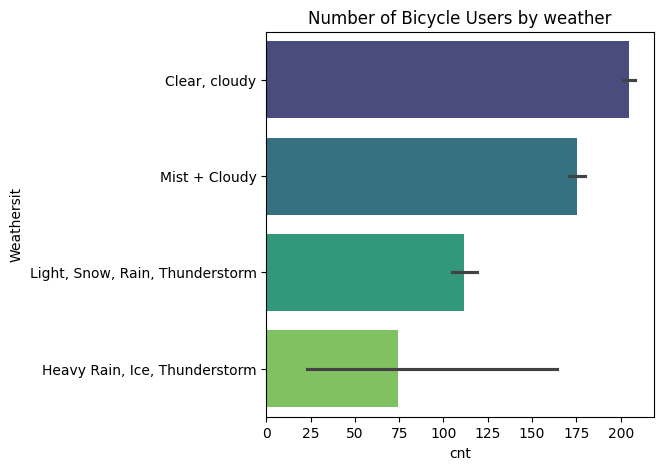

In [35]:
#visualization question 2
plt.figure(figsize=(5,5))
sns.barplot(
    y='weathersit',
    x='cnt',
    data=hour_df,
    palette='viridis')

plt.title('Number of Bicycle Users by weather')
plt.xlabel('cnt')
plt.ylabel('Weathersit')
plt.show()

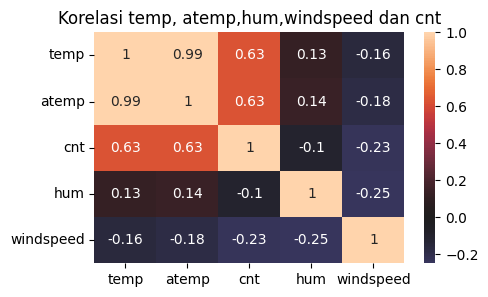

In [36]:
#visualization question 2
column = day_df[['temp', 'atemp', 'cnt', 'hum', 'windspeed']]
correlation = column.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation, annot=True, center=0)
plt.title('Korelasi temp, atemp,hum,windspeed dan cnt')
plt.show()

###Question 3: How does bicycle usage differ between registered and unregistered users?

<ipython-input-37-e26331e80e87>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


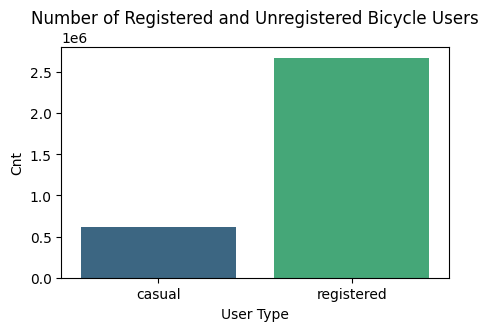

In [37]:
#visualization of question 3
account = day_df[['casual', 'registered']].sum().reset_index()
account.columns = ['User Type', 'Count']

plt.figure(figsize=(5, 3))
sns.barplot(
    x='User Type',
    y='Count',
    data=account,
    palette='viridis'
)

plt.title('Number of Registered and Unregistered Bicycle Users')
plt.xlabel('User Type')
plt.ylabel('Cnt')
plt.show()

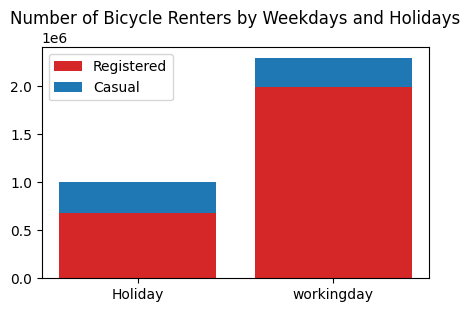

In [39]:
#visualization of question 3
day_pattern = day_df.groupby('workingday').agg({
    'registered': 'sum',
    'casual': 'sum'
}).reset_index()

plt.figure(figsize=(5, 3))
plt.bar(
    day_pattern['workingday'],
    day_pattern['registered'],
    label='Registered',
    color='tab:red'
)
plt.bar(
    day_pattern['workingday'],
    day_pattern['casual'],
    bottom=day_pattern['registered'],
    label='Casual',
    color='tab:blue'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of Bicycle Renters by Weekdays and Holidays')
plt.legend()
plt.show()

##Question 4: Are there any seasonal trends in bicycle use?

<ipython-input-40-961df962a929>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


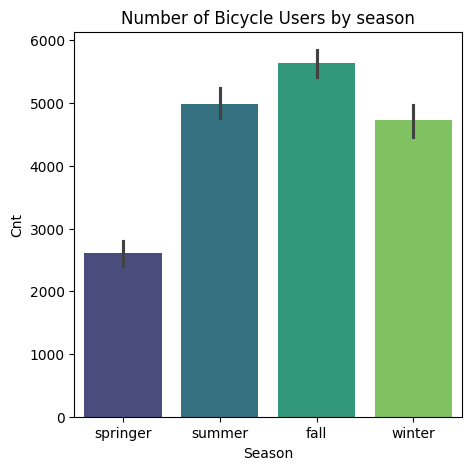

In [40]:
#visualization of question 4
plt.figure(figsize=(5,5))
sns.barplot(
    x='season',
    y='cnt',
    data=day_df,
    palette='viridis')

plt.title('Number of Bicycle Users by season')
plt.xlabel('Season')
plt.ylabel('Cnt')
plt.show()

## Conclusion

###Conclution question 1: Is there a difference in bicycle demand between weekday and holyday?

The total demand for bicycles on weekdays/*working day* is higher than on holidays/*Holiday*, indicating that more people use bicycles for commuting to work or other routine activities on weekdays.


###Conclution question 2: How does weather affect the demand for bicycles?

- The number of bicycle users is very high in *clear, cloudy* weather. this means that bicycle users will decrease if the weather starts to get bad or worse.
- There is a positive correlation between temperature (temp, atemp) and bicycle demand. This means that as temperature increases, the amount of bicycle demand also tends to increase.
- There is a negative correlation between humidity (hum) and bicycle demand, indicating that humid conditions reduce bicycle use.
- Windspeed also shows a negative correlation with the amount of bicycle demand.

###Conclution Question 3: How does bicycle use differ between registered and unregistered users?

Registered users tend to use bicycles more often than unregistered users. The average amount of bicycle use by registered users is higher. This suggests that registered users may use bicycles more often for routine purposes such as commuting to work, while unregistered users are more likely to use bicycles for recreation.

##Conclution Question 4: Are there any seasonal trends in bicycle use?

Bicycle use peaks in the fall. Fall often has more comfortable temperatures than summer which may be too hot and winter which may be too cold. Cooler temperatures make cycling more enjoyable.

In [41]:
hour_df.to_csv("hour_data.csv", index=False)